<a href="https://colab.research.google.com/github/ibelieveai/DS-Projects/blob/master/Multi_Colinearity_and_stepwise_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Part C: Multi-Colinearity and stepwise regression**

In [24]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/Data Science/Rossman-salesforecast/data/"
train_model =  pd.read_csv(data_path+"/train_model_cleaned.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_model = train_model.drop('Unnamed: 0',axis=1)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = train_model.drop('Sales', axis=1)
target = train_model['Sales']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9274816366663515

In [0]:
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])


In [0]:
importance = importance.sort_values('Importance',ascending=False)

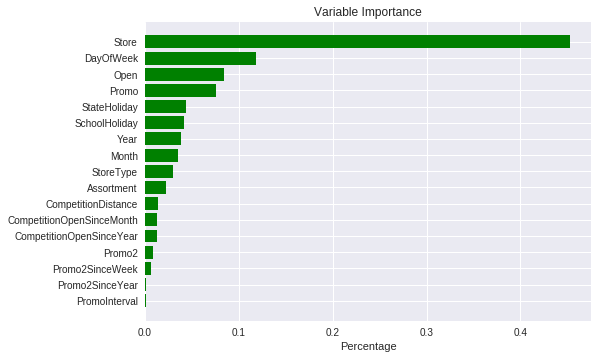

In [37]:
import matplotlib.pyplot as plt
names = X_train.columns
y_pos = np.arange(len(names))

fig, ax = plt.subplots()
ax.barh(y_pos, importance['Importance'], align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_title('Variable Importance')

plt.show()
